In [1]:
###################################
############### MVP ###############
###################################

############### Imports ###############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
############### Data ###############
df = pd.read_csv("/Users/biancaorozco/Desktop/Metis/week02/project-02/airfare_project2/expedia_10_8_2019.csv")
print(df.shape)
df.head(20)

(1268, 10)


id_flight            0
departure_time       0
arrival_time         0
airline              0
duration             0
number_stops         0
departure_airport    0
arrival_airport      0
prices               0
date                 0
dtype: int64

In [3]:
############### Functions ###############
## Duration Time to Minutes
def duration_to_min(duration):
    time = duration.split()
    try:
        minutes = int(time[0])*60 + int(time[1])
        return minutes
    except:
        return None

## 12-hr Time to Minutes
def time_to_min(times):
    ztime = times.zfill(7)
    spaced_time = ztime[:5] + ' ' + ztime[5:]
    split = spaced_time.split()
    try:
        if split[2] == 'pm':
            minutes = (int(split[0])+12)*60 + int(split[1])
        else:
            minutes = int(split[0])*60 + int(split[1])
        return minutes
    except:
        return spaced_time

In [4]:
############### Cleaning Data ###############
## Replacing Number of Stops
df['number_stops'].replace('(Nonstop)', value=int('0'), regex=True, inplace=True)
df['number_stops'].replace('(1 stop)', value=int('1'), regex=True, inplace=True)
df['number_stops'].replace('(2 stop)', value=int('2'), regex=True, inplace=True)
df['number_stops'].replace('(3 stop)', value=int('3'), regex=True, inplace=True)
            
## Removing $ and , from Prices and Convert to Numeric
df['prices'].replace('\$', value='', regex=True, inplace=True)
df['prices'].replace(',', value='', regex=True, inplace=True)
df['prices'] = pd.to_numeric(df.prices)

## Removing h & m from Duration Times
df['duration'].replace('h', value='', regex=True, inplace=True)
df['duration'].replace('m', value='', regex=True, inplace=True)

## Replacing : with _ in Departure and Arrival Times
df['departure_time'].replace(':', value=' ', regex=True, inplace=True)
df['arrival_time'].replace(':', value=' ', regex=True, inplace=True)

## Executing Cleaning Functions
df['departure_time'] = df['departure_time'].apply(time_to_min)
df['arrival_time'] = df['arrival_time'].apply(time_to_min)
df['duration'] = df['duration'].apply(duration_to_min)

In [5]:
############### Features ###############
X = df.loc[:,['id_flight', 'departure_time', 'arrival_time', 'duration', 'number_stops']]
y = df['prices']
# Later, X: 'id_flight', 'departure_time', 'arrival_time', 
#             'airline', 'duration', 'number_stops', 'departure_airport', 
#             'arrival_airport', 'date'

In [6]:
############### Train/Test ###############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [7]:
############### Validate ###############
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print("R-squared Test:", lm.score(X_test, y_test))
print("R-squared Train:", lm.score(X_train, y_train))

R-squared Test: 0.2821355475992101
R-squared Train: 0.2755153810594849


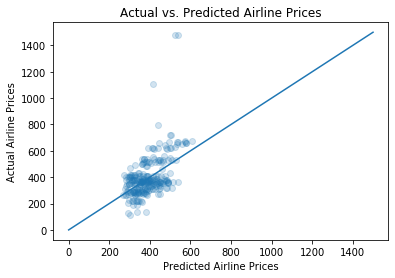

In [8]:
############### Actual vs Predicted ###############
plt.scatter(pred_test, y_test, alpha=.2)
plt.plot(np.linspace(0,1500,100), np.linspace(0,1500,100))
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices');